<a href="https://colab.research.google.com/github/baekka1/Crop-Yield-Prediction/blob/main/GrowthPhaseVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Upload file
uploaded = files.upload()
df = pd.read_csv("all_feature_data_avg.csv")

# Check data
df.head()


Saving all_feature_data_avg.csv to all_feature_data_avg (1).csv


,Unnamed: 0,year_index,index,id2,year,yield,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th
0,0,0,1,112,1980,27.0,302.547299,88.534865,4.169133,0.010406,244.856055,1.477316,34.108888,2.150448,287.698991,182.028998
1,1,1,2,113,1980,28.0,302.068878,85.865079,3.564974,0.010097,243.893545,1.461499,34.400296,2.342725,287.706825,192.143968
2,2,2,3,119,1980,29.0,303.100471,91.763880,3.560391,0.011191,251.878185,1.429625,36.004177,2.067676,288.491839,178.083970
3,3,3,4,120,1980,28.0,302.966961,88.569844,3.964970,0.010669,250.073255,1.484913,35.960727,2.714061,288.009203,192.123030
4,4,4,5,124,1980,24.0,303.312180,89.555033,3.494477,0.011313,254.001956,1.481304,36.824029,2.435780,289.358179,176.449627


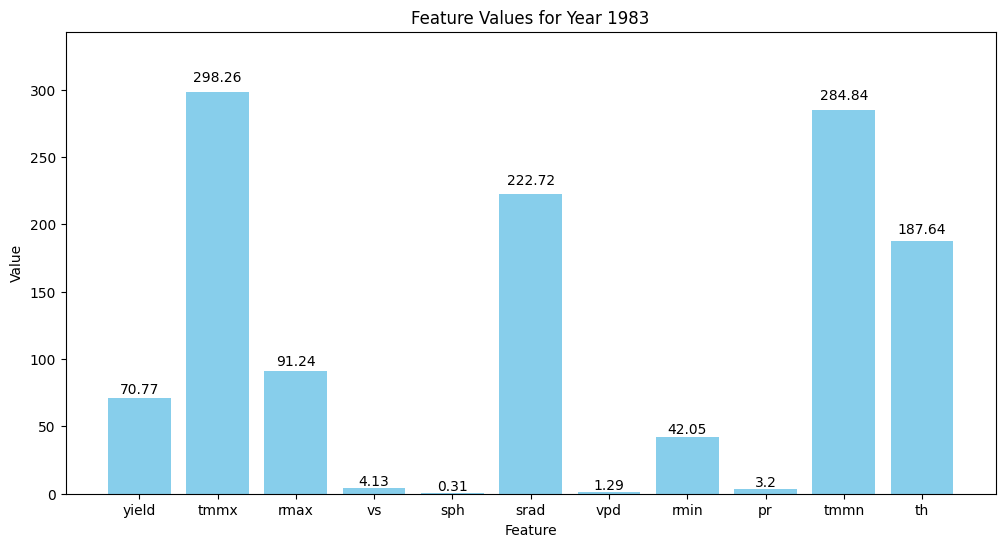

In [ ]:
low_years = [1983, 1988, 2012]
df_filtered = df[df['year'].isin(low_years)]
df_aggregated = df_filtered.groupby('year').mean().reset_index()

feature_columns = ['yield', 'tmmx', 'rmax', 'vs', 'sph', 'srad', 'vpd', 'rmin', 'pr', 'tmmn', 'th']

# Extract the values for 1983
values_1983 = df_aggregated.loc[0, feature_columns]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_columns, values_1983, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, round(yval, 2), ha='center', va='bottom')

plt.title('Feature Values for Year 1983')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.ylim(0, values_1983.max() * 1.15)
plt.show()



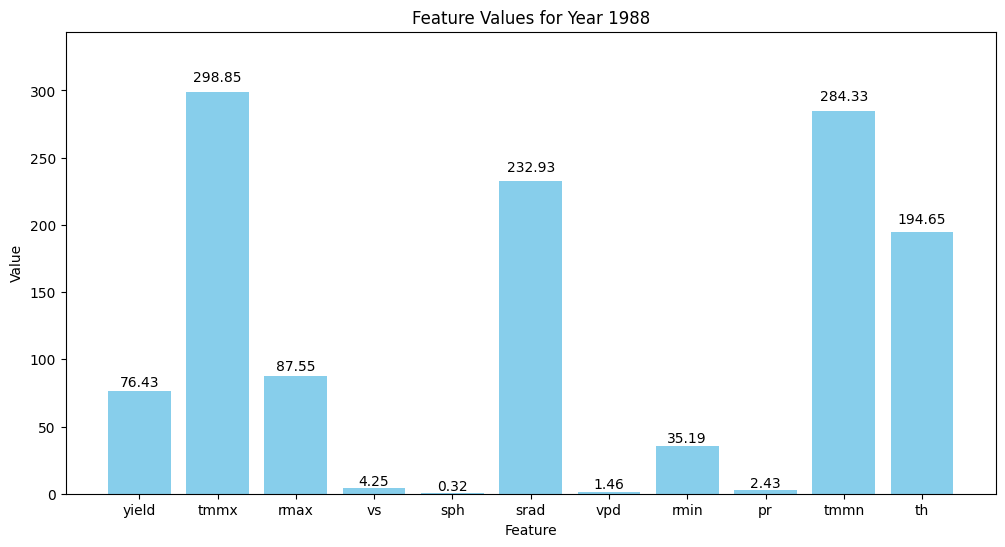

In [ ]:
# Extract the values for 1988
values_1988 = df_aggregated.loc[1, feature_columns]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_columns, values_1988, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, round(yval, 2), ha='center', va='bottom')

plt.title('Feature Values for Year 1988')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.ylim(0, values_1988.max() * 1.15)
plt.show()



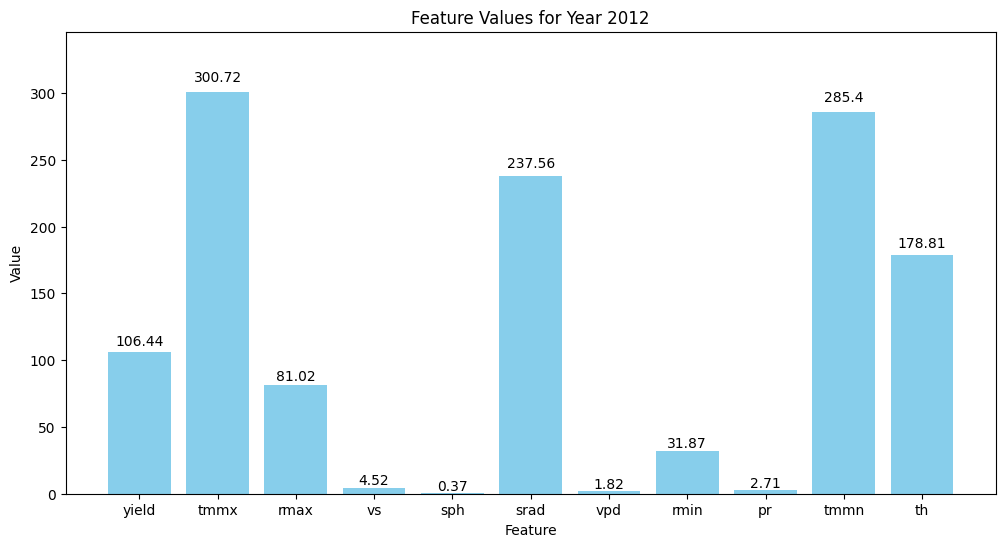

In [ ]:
# Extract the values for 2012
values_2012 = df_aggregated.loc[2, feature_columns]

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(feature_columns, values_2012, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02*yval, round(yval, 2), ha='center', va='bottom')

plt.title('Feature Values for Year 2012')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.ylim(0, values_2012.max() * 1.15)
plt.show()

In [10]:
# A list to hold the DataFrames for each year after phase assignment
all_years_data = []

# Group the DataFrame by the 'year' column to process each year individually
for year, year_df in df.groupby('year'):
    # Sort data within the year by 'year_index' to ensure chronological order
    year_df = year_df.sort_values(by='year_index').reset_index(drop=True)

    # Determine the indices for splitting the data into three equal parts
    n_records = len(year_df)
    split1 = n_records // 3
    split2 = 2 * (n_records // 3)

    # Define the phase labels
    phases = ['germination'] * split1
    phases += ['growth'] * (split2 - split1)
    # The remaining part goes to maturity, handling potential rounding issues
    phases += ['maturity'] * (n_records - split2)

    # Assign the list of phase labels as a new column in the DataFrame
    year_df['phase'] = phases

    # Add the processed DataFrame for the year to our list
    all_years_data.append(year_df)

# Concatenate all the yearly data back into a single DataFrame
combined_df = pd.concat(all_years_data, ignore_index=True)

# Identify numeric columns, excluding 'Unnamed: 0', 'year_index', 'index', 'id2', and 'year'
numeric_cols = combined_df.select_dtypes(include=['number']).columns.tolist()
cols_to_exclude = ['Unnamed: 0', 'year_index', 'index', 'id2', 'year']
numeric_cols = [col for col in numeric_cols if col not in cols_to_exclude]

# Group by year and phase and calculate the mean for the numeric columns
phase_summary_by_year = combined_df.groupby(['year', 'phase'])[numeric_cols].mean().reset_index()

# Reorder the phases within each year for logical chronological sequence
phase_summary_by_year['phase'] = pd.Categorical(phase_summary_by_year['phase'], categories=['germination', 'growth', 'maturity'], ordered=True)
phase_summary_by_year = phase_summary_by_year.sort_values(['year', 'phase'])


# Save the phase summary by year to a new CSV file
phase_summary_by_year.to_csv('phase_summary_by_year.csv', index=False)

# Display the phase summary by year
display(phase_summary_by_year)

,year,phase,yield,tmmx,rmax,vs,sph,srad,vpd,rmin,pr,tmmn,th
0,1980,germination,86.467512,299.537970,89.083902,3.875125,0.009683,232.108325,1.134534,39.033602,2.578112,285.493471,186.901184
1,1980,growth,71.323963,298.463688,89.392625,3.951946,0.009075,228.142756,1.073721,38.891108,2.318098,284.211223,191.969479
2,1980,maturity,75.582719,298.790083,91.410526,4.601433,0.907930,227.144114,1.872947,41.677229,3.671515,284.743750,199.502544
3,1981,germination,112.247178,298.138329,92.058572,3.914774,0.009899,218.157747,0.896178,43.787324,3.520199,285.579549,175.704400
4,1981,growth,96.736117,297.059721,91.936572,3.903516,0.009270,216.193338,0.837646,43.332260,3.315791,284.158341,184.592376
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,2017,growth,165.328529,297.438788,89.063751,4.133205,0.009347,230.705982,0.904637,44.158168,3.540456,285.057706,187.160395
113,2017,maturity,156.725970,298.279411,90.616377,5.167627,1.173596,230.772022,2.051323,44.821486,4.601198,285.732011,188.979959
114,2018,germination,186.537201,298.066326,91.469620,4.027300,0.010590,227.527833,0.856548,48.178153,4.223067,286.398077,167.611633
115,2018,growth,159.825256,297.748413,90.607641,4.047679,0.010245,226.916546,0.883849,47.053484,3.849903,285.880399,169.394041


/tmp/ipython-input-3435343460.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  phase_summary_overall = phase_summary_by_year.groupby('phase')[features_to_plot].mean()


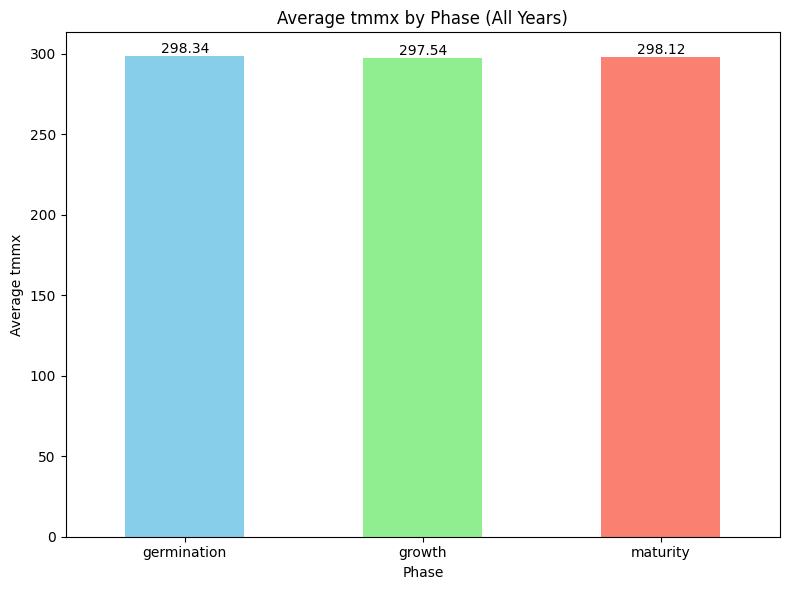

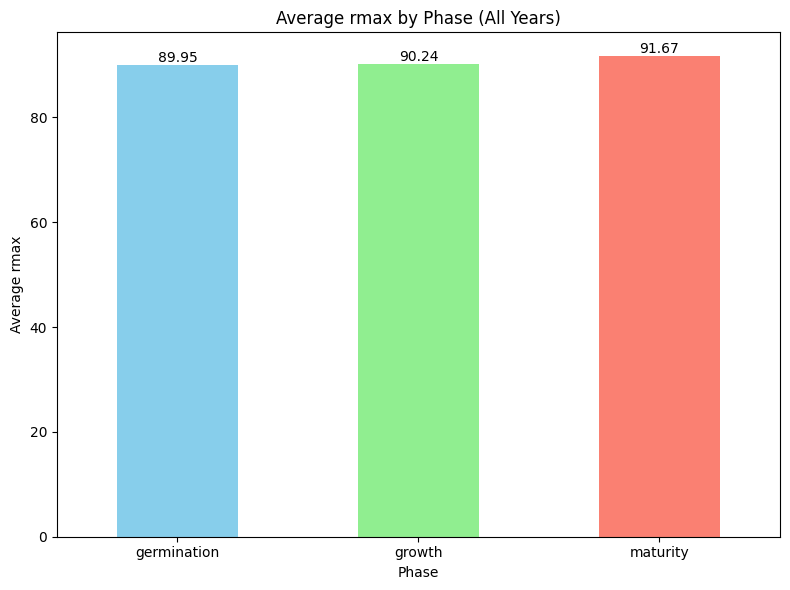

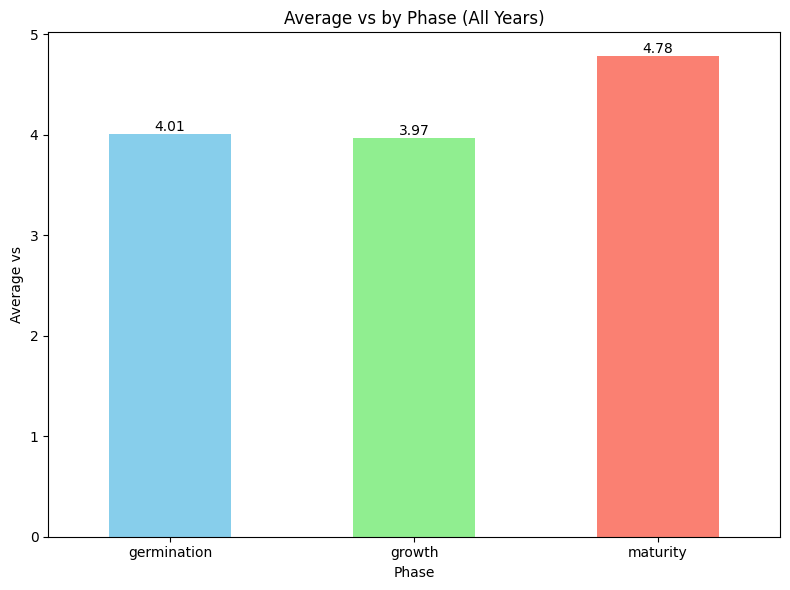

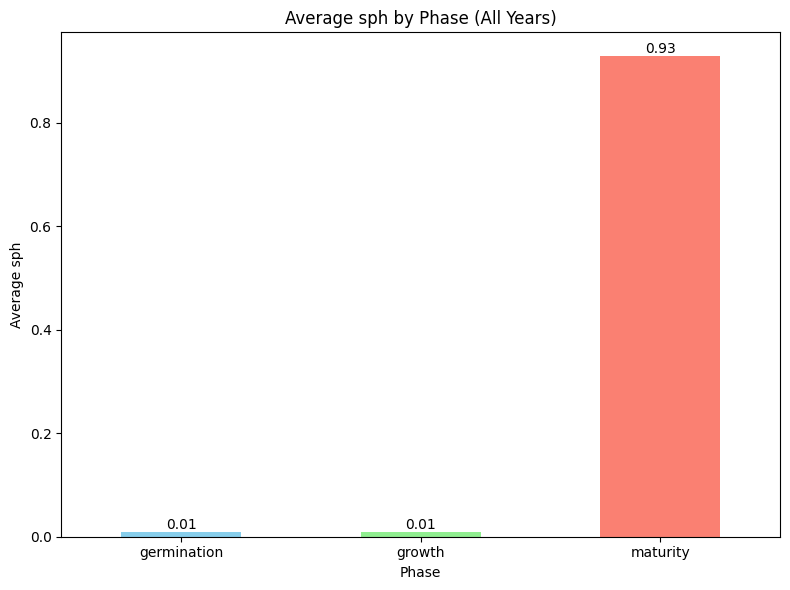

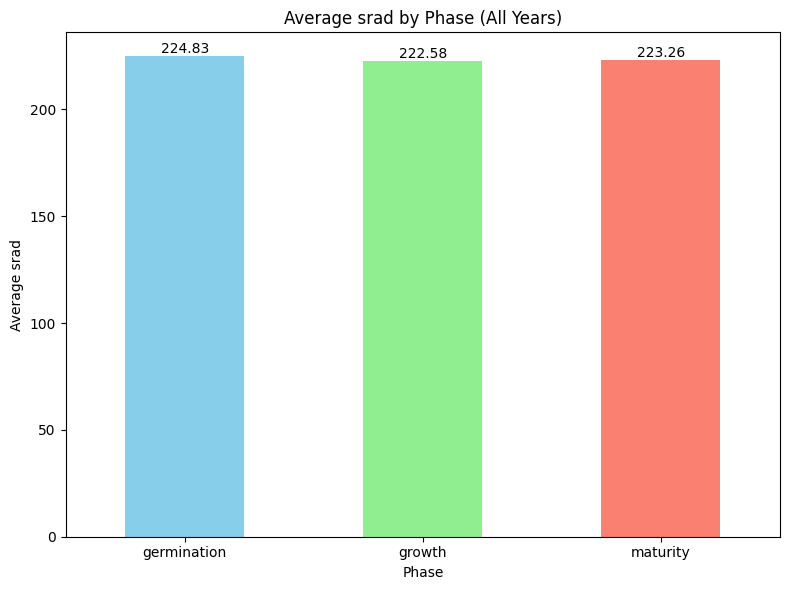

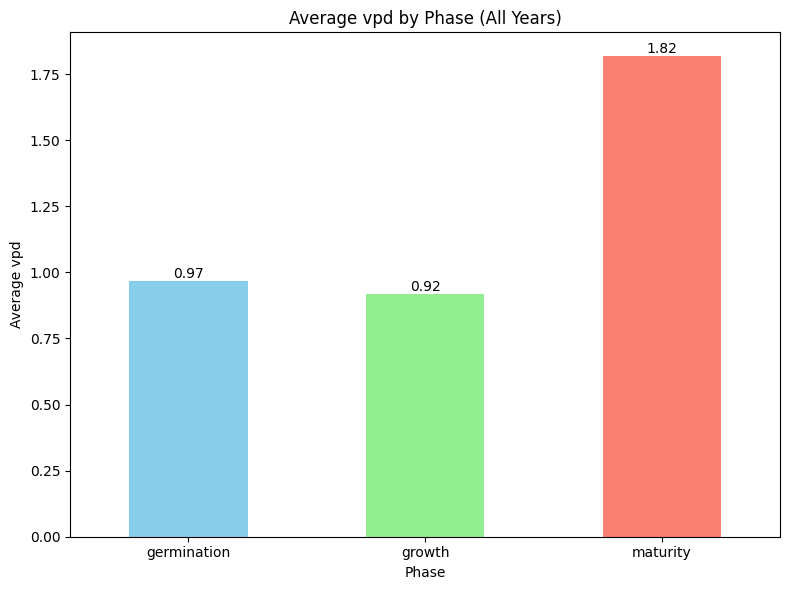

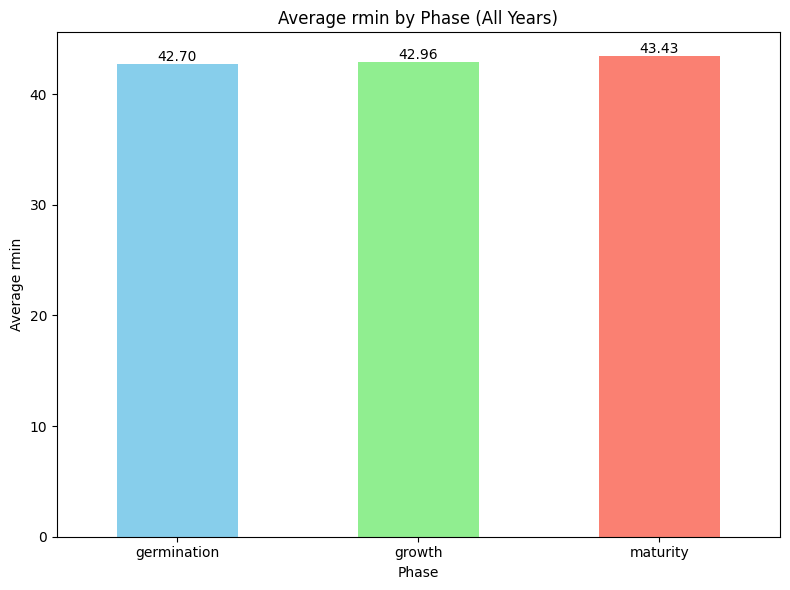

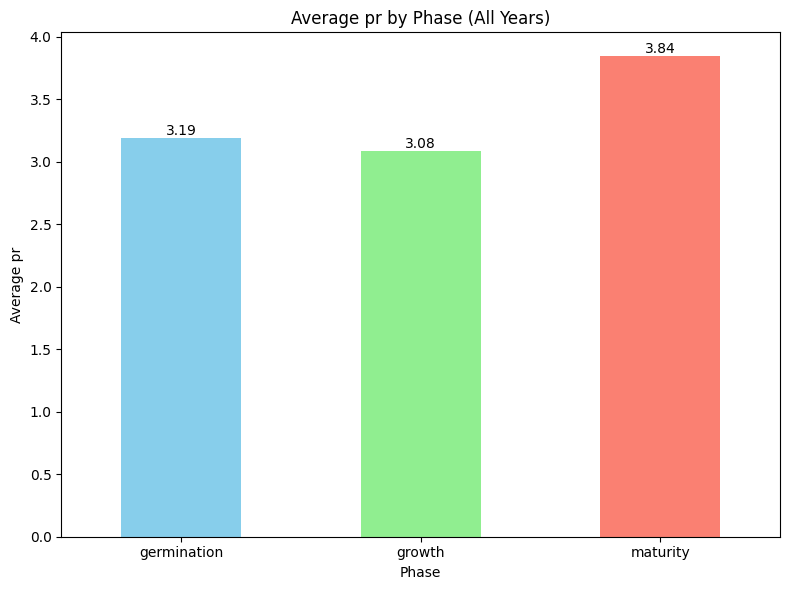

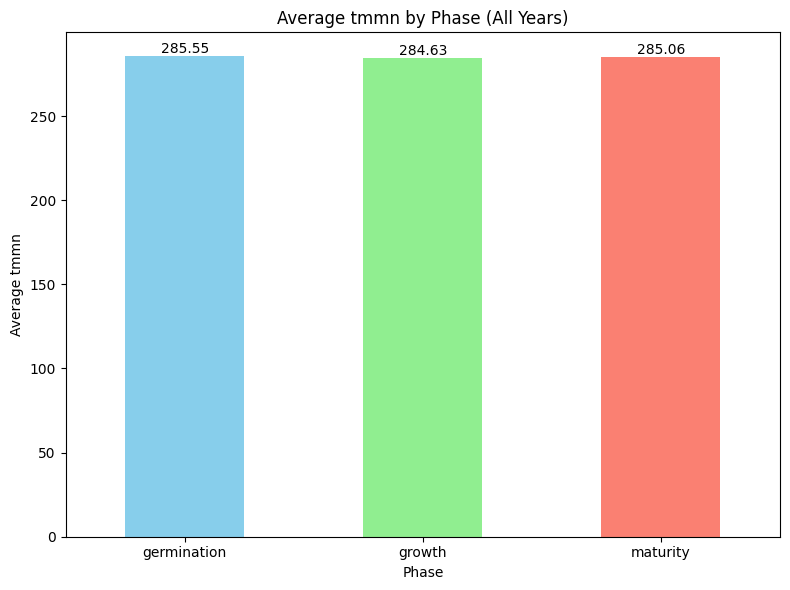

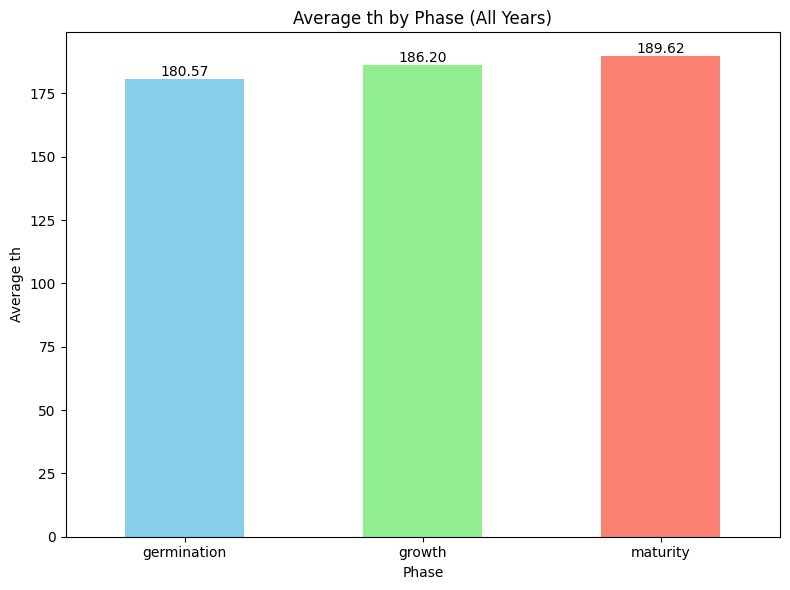

In [13]:
features_to_plot = ['tmmx', 'rmax', 'vs', 'sph', 'srad', 'vpd', 'rmin', 'pr', 'tmmn', 'th']

phase_summary_overall = phase_summary_by_year.groupby('phase')[features_to_plot].mean()

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    ax = phase_summary_overall[feature].plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])
    plt.title(f'Average {feature} by Phase (All Years)')
    plt.xlabel('Phase')
    plt.ylabel(f'Average {feature}')
    plt.xticks(rotation=0)
    plt.tight_layout()

    # Add value labels on top of each bar
    for i, v in enumerate(phase_summary_overall[feature]):
        ax.text(i, v + v*0.02, f"{v:.2f}", ha='center', va='bottom')

    plt.show()